In [1]:
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegressionCV

import sys
sys.path.append('../../')
from src.skmatter.decomposition._pcovc import PCovC

plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['scatter.edgecolors'] = "k"

random_state = 0

In [2]:
bcancer = datasets.load_breast_cancer()
print(bcancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [3]:
X, y = bcancer.data, bcancer.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
from sklearn.linear_model import LogisticRegression


model_ss = PCovC(classifier=LogisticRegression(), n_components=2, mixing=0.5, tol=1e-12, space="sample")
model_fs = PCovC(classifier=LogisticRegression(), n_components=2, mixing=0.5, tol=1e-12, space="feature")

model_ss.fit(X_scaled, y)
model_fs.fit(X_scaled, y)

X_ss = model_ss.transform(X_scaled)
X_fs = model_fs.transform(X_scaled)

r_ss = model_ss.inverse_transform(X_ss)
r_fs = model_fs.inverse_transform(X_fs)

print(r_ss.shape)
print(r_ss)
print(r_fs)

np.isclose(r_ss, r_fs, 0.0001)

(569, 30)
[[ 1.48153286  0.89453518  1.59711434 ...  2.28316034  1.4864173
   1.79276434]
 [ 1.22249902  0.52573881  1.17362272 ...  0.5741356  -0.11843924
  -0.6346527 ]
 [ 1.38679455  0.72121439  1.41612206 ...  1.42105825  0.65605467
   0.5223906 ]
 ...
 [ 0.55397473  0.23622918  0.53046199 ...  0.24777941 -0.06639284
  -0.30758868]
 [ 1.82914758  1.06780946  1.94698273 ...  2.59307582  1.60333488
   1.84900221]
 [-0.77495129 -0.46895878 -0.83612255 ... -1.20074147 -0.78415974
  -0.94820612]]
[[ 1.48205306  0.89482239  1.59762976 ...  2.28357453  1.48656296
   1.79275378]
 [ 1.2231335   0.5260017   1.1742505  ...  0.57458012 -0.11837007
  -0.63473139]
 [ 1.38739193  0.72149704  1.4167138  ...  1.42150377  0.65616583
   0.52234735]
 ...
 [ 0.55427362  0.23635115  0.53075646 ...  0.24797721 -0.06637217
  -0.30764449]
 [ 1.82981835  1.06816742  1.94764864 ...  2.59361309  1.60351832
   1.8489991 ]
 [-0.77524851 -0.46911622 -0.83641359 ... -1.20094579 -0.7842089
  -0.94814847]]


array([[False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False,  True,  True]], shape=(569, 30))

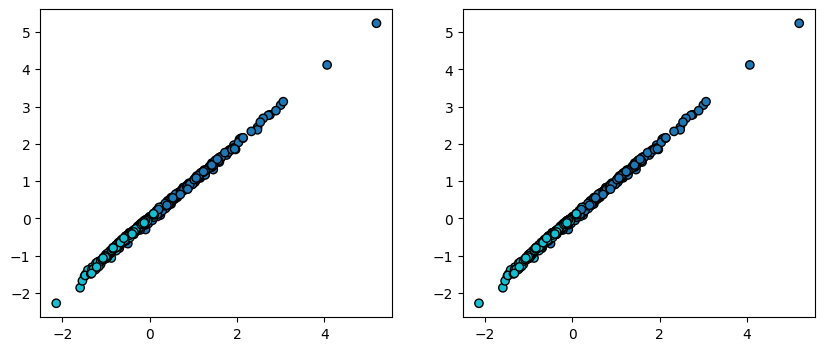

In [5]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(10, 4))
axis1.scatter(r_ss[:, 2], r_ss[:, 3], c=y)
axis2.scatter(r_fs[:, 2], r_fs[:, 3], c=y)

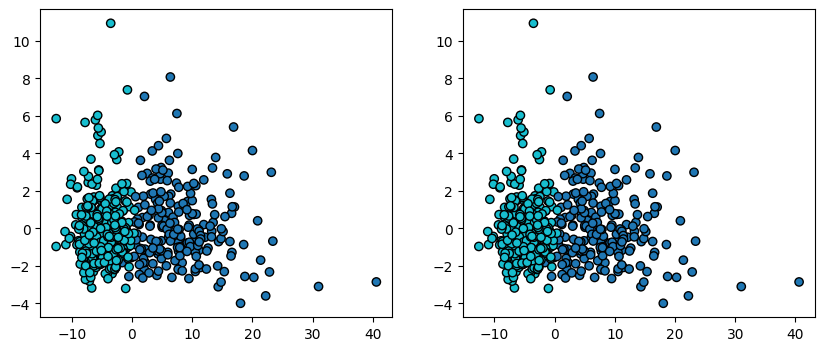

In [6]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(10, 4))
axis1.scatter(X_ss[:, 0], X_ss[:, 1], c=y)
axis2.scatter(X_fs[:, 0], X_fs[:, 1], c=y)